<a href="https://colab.research.google.com/github/minyoy/ML-DL-Basics-study/blob/main/wk2/assignment_wk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment (Problem set #2)

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Q1. Linear SVM

유방암 분류 데이터셋을 이용해 Support Vector Machine을 이해해보자.scikit-learn에서 제공하는`load_breast_cancer`을 가져와 이용하면 된다.

이 데이터 세트에는 유방암 종양에 대한 정보가 포함되어 있으며 30가지 feature가 있다. 목표는 종양의 특징에 따라 **종양이 악성인지 양성인지** 예측하는 것임.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/wk2/dataset/breast_cancer.csv')

# 특징과 타겟을 X,y로 분리
# 특징은 Class만을 제외한 행이기에 drop 메소드를 사용해주었으며, y는 Class만을 취하기 때문에 인덱싱으로 데이터를 분리해주었음
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# make dataframe by using pandas method
# 데이터프레임 생성을 위해 X를 복사, y는 target으로 이름을 지정해 추가해줌
df = X.copy()
df['target'] = y

# 상위 5개의 값 출력
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,target
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
# 데이터프레임의 요약 통계를 보여줌
# 데이터 개수, 평균, 표준편차, 최솟값, 1사분위수, 중앙값, 3사분위수, 최댓값
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,target
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
# 타겟데이터의 값이 각각 몇번 등장했는지 카운트해줌
df.target.value_counts()

,count
target,
2,444
4,239


In [ ]:
# df_x에는 target column을 제외한 데이터를, df_y에는 target column을 저장하도록 구성하시오.
# HINT : use iloc
# 정수 인덱싱인 iloc 함수를 사용하여,
# df_x는 모든 행을 선택하고 마지막 열을 제외하고 선택, df_y는 모든 행과 마지막 열을 선택
df_x = df.iloc[:,:-1]
df_y = df.iloc[:,-1]

# define model
# svm에서 제공하는 SVC를 가져와서 모델을 정의해라.
# 이때 kernel은 'linear'로, C는 0,5로 지정할 것.
# kernel은 커널함수를 지정하는 옵션으로 해당 모델에서는 선형함수를 택함, 선형으로 데이터를 분류한다는 뜻
# C는 규제 정도를 조절하는 값으로, C가 작을수록 규제를 더 완화시킴, C가 클수록 규제를 강화시킴
# 이 모델에서는 0.5로 기본값 1.0보다 더 완화된 규제
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=0.5)

# SVM에서 핵심은 margin을 계산하는 것이기 때문에, scaling이 중요하다.
# 따라서 scaling을 진행한다.
# scaling을 위해 StandardScaler로 표준화함
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_x)

scaled_x = scaler.transform(df_x)

In [ ]:
# train_test_split 모듈을 활용해 데이터를 분할해보자.
# 이때 test와 train의 비율은 2:8, random_state 는 42로 지정하십시오.
# train_test_split 함수로 데이터를 분할함
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_x, df_y, test_size=0.2, random_state=42)

# fit으로 훈련, predict로 test값을 예측함
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# 성능 평가
# 예측한 값을 토대로 정확도를 계산해보니 97%가 나옴을 알 수 있음
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test)*100, "%")

97.08029197080292 %


## Q2. Logistic Regression

우리는 로지스틱 회귀에 대해 이해하고자 suv dataset을 관찰하기로 했다. **데이터가 로지스틱 회귀에 사용될 수 있는 이유**에 대해 생각해보고, 주석을 참고하여 **문제를 해결**하시오.

In [ ]:
# make_classification()을 활용해 로지스틱 회귀용 가상 데이터를 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load dataset
# read_csv 함수로 데이터를 불러오고 상위 5개의 값을 출력
data = pd.read_csv('/content/drive/MyDrive/wk2/dataset/suv_data.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# data를 독립변수(X)와 종속 변수(y)에 선언하자.
# 이때 feature들로는 Age, EstimatedSalary만 이용한다고 하자.
# X에는 Age, y에는 측정월급으로 분할
# 입력데이터인 X는 2차원 행렬이 되어야하기에 Dataframe으로 반환, 출력데이터인 y는 정답값만 필요하기에 Series로 반환
X = data[['Age']]
y = data['EstimatedSalary']

In [ ]:
from sklearn.model_selection import train_test_split
# train set과 test set으로 split 하시오.
# 이때 test의 비율을 20%, random_state는 0으로 지정할 것.
# 앞과 마찬가지로 train_test_split 함수로 데이터 분할
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# define model
# 규제는 Ridge regression에 해당하는 것으로 설정하고, iteration은 1000으로 지정해보자.
# 로지스틱회귀 모델 선언, 규제는 릿지인 l2로 설정, 반복 최대횟수는 1000으로 설정
# 라쏘가 l1, 릿지가 l2, elasticnet은 라쏘+릿지 혼합, none은 규제없음
model =  LogisticRegression(penalty='l2', max_iter=1000)
# 훈련데이터로 모델 훈련
model.fit(x_train, y_train)

# 계수값과 절편값 출력
print(model.coef_, model.intercept_)

[[-0.21310562]
 [-0.35182248]
 [-0.20452613]
 [-0.1885835 ]
 [-0.45324822]
 [ 0.15414081]
 [-0.05525331]
 [-0.00179774]
 [ 0.0228683 ]
 [-0.0839672 ]
 [ 0.22691813]
 [-0.221462  ]
 [ 0.00840532]
 [ 0.27792802]
 [ 0.10628677]
 [-0.15917   ]
 [-0.13761897]
 [ 0.0489992 ]
 [ 0.27792802]
 [-0.02957199]
 [-0.0639934 ]
 [-0.18926742]
 [ 0.15908125]
 [ 0.11108946]
 [ 0.05661148]
 [ 0.17597274]
 [-0.15089073]
 [-0.10393175]
 [ 0.0674542 ]
 [ 0.56328787]
 [ 0.09498989]
 [-0.38256874]
 [-0.09071413]
 [ 0.00434046]
 [ 0.00878564]
 [-0.06334251]
 [-0.00462361]
 [-0.03310602]
 [-0.18586781]
 [-0.03315343]
 [-0.0998415 ]
 [-0.0369229 ]
 [ 0.02313552]
 [-0.03687704]
 [-0.14704724]
 [-0.08979284]
 [ 0.05061307]
 [ 0.03546984]
 [-0.23269597]
 [-0.26252035]
 [-0.09338808]
 [-0.03383517]
 [-0.02629779]
 [-0.01728212]
 [-0.00179774]
 [ 0.03855111]
 [-0.02998644]
 [ 0.09844574]
 [-0.00462361]
 [-0.03046014]
 [-0.06937258]
 [-0.24410607]
 [-0.10855706]
 [ 0.08298571]
 [-0.2505285 ]
 [-0.18926742]
 [-0.42058

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 아래 셀들을 실행 시켜보고, 두 불확실성 추정 함수의 역할 및 공통점에 대해서 생각해보시오.
from scipy.special import expit

decisions = np.round(model.decision_function(x_test), decimals=3)
# 모델의 출력값을 시그모이드 함수(expit)로 계산 -> 확률을 얻을 수 있음
print(expit(decisions))

[[8.51826628e-01 6.70842936e-01 8.54954405e-01 ... 6.71946055e-01
  7.20108527e-01 1.20925435e-02]
 [5.10998226e-01 1.08902584e-01 5.34196531e-01 ... 3.49554051e-01
  6.85033185e-01 9.32992832e-02]
 [6.64630870e-01 2.59801599e-01 6.79396555e-01 ... 4.70285058e-01
  6.98465216e-01 4.42348197e-02]
 ...
 [4.05644612e-01 5.70008071e-02 4.32416164e-01 ... 2.77679776e-01
  6.75901528e-01 1.49059076e-01]
 [4.10125449e-02 6.23212250e-04 5.06903249e-02 ... 4.18866071e-02
  6.13251377e-01 8.47871044e-01]
 [1.33079567e-01 5.12238285e-03 1.54073854e-01 ... 1.06595324e-01
  6.42906121e-01 5.30213146e-01]]


In [ ]:
# 모델의 예측 확률을 출력
print(model.predict_proba(x_test))

[[1.57054094e-02 5.56821645e-03 1.60934028e-02 ... 5.59415027e-03
  7.02899426e-03 3.34289271e-05]
 [4.10900424e-03 4.80232670e-04 4.50965599e-03 ... 2.11223120e-03
  8.54854168e-03 4.04406591e-04]
 [7.15632556e-03 1.26805211e-03 7.65453542e-03 ... 3.20589987e-03
  8.36765401e-03 1.67260562e-04]
 ...
 [2.74639632e-03 2.43215018e-04 3.06635254e-03 ... 1.54738389e-03
  8.38970194e-03 7.04850413e-04]
 [9.26331996e-05 1.35151937e-06 1.15628229e-04 ... 9.47319602e-05
  3.43661756e-03 1.20708864e-02]
 [5.35810560e-04 1.79692802e-05 6.35261189e-04 ... 4.16151179e-04
  6.27902439e-03 3.93756215e-03]]


# Q3. Logistic Regression 2



`diagnostic measure dataset`을 이용해 `당뇨 발병 여부(Outcome)`를 예측해보자.

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# diabetes csv 불러오기
df = pd.read_csv("/content/drive/MyDrive/wk2/dataset/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Attribute Information:

Pregnancies:  Number of times pregnant
Glucose:  2 hours Plasma glucose concentration in an oral glucose tolerance test
BloodPressure:  Diastolic blood pressure (mm Hg)
SkinThickness:  Triceps skin fold thickness (mm)
Insulin:  2-Hour serum insulin (mu U/ml)
BMI:  Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction:  A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
Age:  Age (years)
Outcome:  Class variable. Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no).

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 결과값의 각 개수 출력, 0인 음성 데이터가 1인 양성 데이터보다 많음을 알 수 있음
df['Outcome'].value_counts() # n(Negative outcome) > n(positive outcome)

,count
Outcome,
0,500
1,268


In [ ]:
# count the number of NaN (null) values in each column
# 결측치 출력, 없음을 확인할 수 있음
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# df의 마지막 열을 y(target)로 하고 나머지는 x(features)가 되도록 데이터를 분리해보자.
# 앞서 했던 것과 마찬가지로 iloc 함수로 마지막 열만 제외하고 X로, 마지막 열만 y로 분할
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Feature scaling
# 앞서했던 것과 마찬가지로 표준화 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:, :6] #관찰

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075,  0.15453319,  0.27959377,
        -0.73518964],
       [-0.84488505,  0.1597866 , -0.47073225, -1.28821221, -0.69289057,
        -0.24020459],
       [-0.84488505, -0.8730192 ,  0.04624525,  0.65635768, -0.69289057,
        -0.20212881]])

In [ ]:
# train, test로 분리해보세요. (단, test_size는 0.2, random state는 156으로, stratify는 y가 되도록 설정)
# 마찬가지로 train, test 데이터셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define model
# 로지스틱 회귀 선언 및 학습
clf = LogisticRegression()

# 모델 학습
clf.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**모델의 정확도 구하기**  
**HINT** :Scikit-learn의 metrics에는 `accuracy_score()`이라는 function이 있습니다. 이에 대해 찾아보시고, 어떤 값을 대입해야할지 고민해보세요.
이때 pred에는 x_test에 대한 모델의 예측값이 들어가야함.

In [ ]:
# 모델의 정확도를 찾아보자.
# HINT : from sklearn.metrics import accuracy_score를 찾아보시고 사용해보세요.
# 정확도를 출력해보니 약 77%임을 확인해볼 수 있음
from sklearn.metrics import accuracy_score

pred = clf.predict(x_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy : {}".format(accuracy))

Accuracy : 0.7727272727272727


# Bonus

Prometheus 2022 basic study wk3 assignment Problem 2

  
Scikit-learn의 datasets 서브 패키지에는 선형 회귀/로지스틱 회귀용 가상 데이터를 생성할 수 있는 명령어인 `make_regression()`, `make_classification()`이 있습니다. 다음 명령어를 활용해 선형 회귀와 로지스틱 회귀를 구현하세요.

*1*. `make_regression()`을 활용해 선형 회귀용 가상 데이터를 생성하세요.

- sample은 5000개, feature variable은 2개로 지정하세요.
- y절편을 10 증가시키고, 전체적인 데이터의 variance를 10으로 지정하세요.

In [ ]:
from sklearn.datasets import make_regression

# make_regression 함수로 가상 데이터 생성
x, y = make_regression(n_samples=5000, n_features=2, bias=10, noise=10)

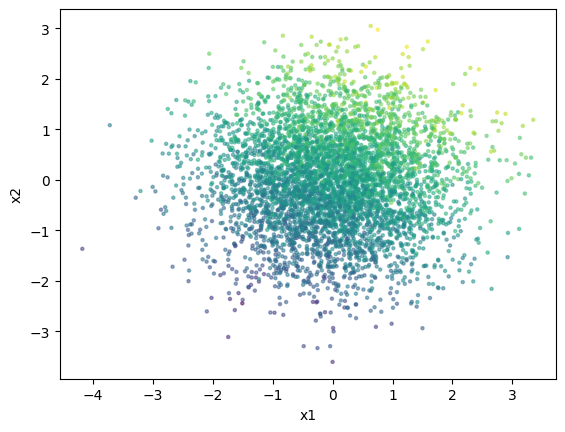

In [ ]:
import matplotlib.pyplot as plt

# 산점도 그래프로 시각화
plt.scatter(x[:,0], x[:,1], c=y, s=5, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

2. 위의 데이터를 가지고 선형회귀를 구현해보세요.

- train data와 test data를 8:2 비율로 분할하세요.
- 예측 오차를 더 줄이기 위해 데이터 표준화를 진행하세요.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 훈련데이터셋과 검증데이터셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# x 훈련, 검증 데이터셋 변환
std_scale = StandardScaler()
std_scale.fit(x_train)

x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

# 선형 회귀 선언 및 훈련
lr = LinearRegression()
lr.fit(x_train_std, y_train)

LinearRegression()

3. `make_classification()`을 활용해 로지스틱 회귀용 가상 데이터를 생성하세요.

- sample은 1000개, feature variable은 1개로 지정하세요.
- feature variable을 1개로 지정했기 때문에, 관련된 변수들을 모두 조정해야 합니다. `n_informative`, `n_redundant`, `n_cluster_per_class` 의 변수를 알맞게 조정해보세요.

In [ ]:
from sklearn.datasets import make_classification
# make_classification 함수로 로지스틱 회귀용 가상 데이터 생성
x, y = make_classification(n_samples=1000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

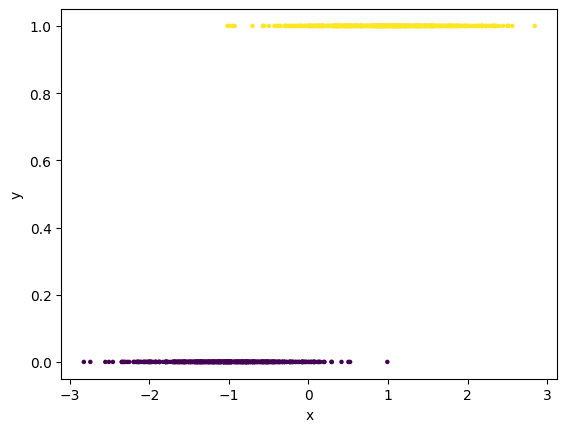

In [ ]:
import matplotlib.pyplot as plt

# 산점도 그래프로 시각화
plt.scatter(x, y, c=y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 훈련, 검증 데이터셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 선형회귀로 훈련한 후 계수와 절편 출력
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_, lr.intercept_)

[0.35288293] 0.5126369299598432
